# Welcome to my Notebook Tutorial
* in this notebook, I want to analyze the Human Resource dataset. I will build different models and compare them with their gained accuracy.
* The datasets contains the following categories such as:
satisfaction_level     
 1   last_evaluation       
 2   number_project        
 3   average_montly_hours   
 4   time_spend_company     
 5   Work_accident           
 6   left                   
 7   promotion_last_5years  
 8   department             
 9   salary 
 
 We want to predict if the employee left the company or not. 1 means the employee left the company

# This Notebook Contains:
* Data Underestanding
* Data Exploration
* Data Preparation
* Data Visualization
* Feature Engineering
* Build Machine Learning Models
* Machine Learning Models With Cross Validation
* Model Evaluation
* Hyperprameters Tuning



In [1]:
#Lets import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Underestanding

In [2]:
Data = pd.read_csv("../input/human-resource-datasets/HR.csv")
Data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
Data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
Data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [5]:
# Get some information on the types of variables in data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
Data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Great, we do not have any missing values.

In [7]:
# Print the unique values of the "salary" column
print(Data.salary.unique())

['low' 'medium' 'high']


In [8]:
print(Data['department'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


In [9]:
print(Data['salary'].value_counts())

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [10]:
table = Data.pivot_table(values="satisfaction_level", 
                         index="department", columns="salary",aggfunc=np.count_nonzero)
table


salary,high,low,medium
department,,,
IT,83.0,609.0,535.0
RandD,51.0,364.0,372.0
accounting,74.0,358.0,335.0
hr,45.0,335.0,359.0
management,225.0,180.0,225.0
marketing,80.0,402.0,376.0
product_mng,68.0,451.0,383.0
sales,269.0,2099.0,1772.0
support,141.0,1146.0,942.0


# Data Visualization

# Box Plot


/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


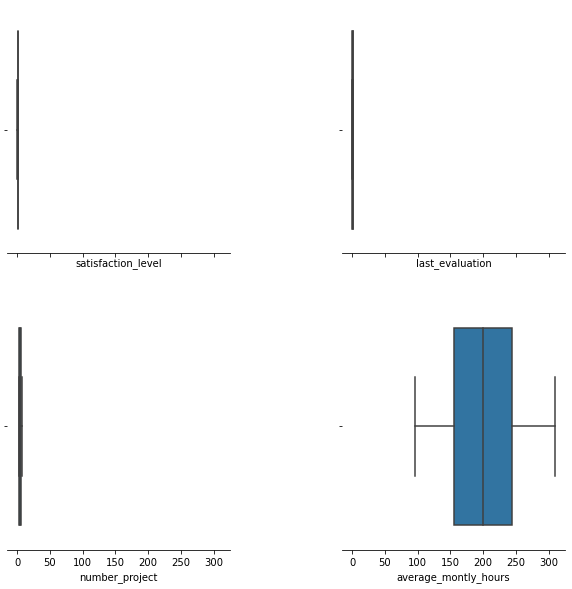

In [11]:
f, axes = plt.subplots(2,2, figsize=(10,10), sharex=True)

plt.subplots_adjust(wspace=0.5)# adjust the space between the plots

sns.despine(left=True)

# plot a boxplot of satisfaction_level to see if there is outliers
sns.boxplot( x= 'satisfaction_level',  data=Data, orient='v',ax=axes[0,0])

# plot a boxplot of last_evaluation to see if there is outliers
sns.boxplot( x= 'last_evaluation',  data=Data, orient='v',ax=axes[0,1])

# plot a boxplot of number_project to see if there is outliers
sns.boxplot( x= 'number_project',  data=Data, orient='v',ax=axes[1,0])

# plot a boxplot of average_montly_hours to see if there is outliers
sns.boxplot( x= 'average_montly_hours',  data=Data, orient='v',ax=axes[1,1]);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='left', ylabel='count'>

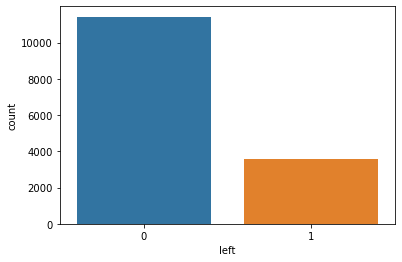

In [12]:
sns.countplot('left',data=Data )

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='salary', ylabel='count'>

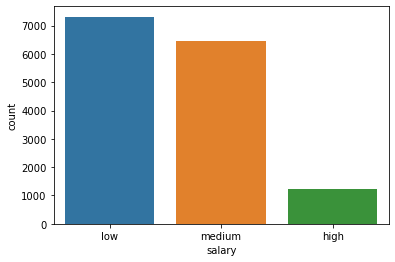

In [13]:
sns.countplot('salary',data=Data )

Salary & left

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


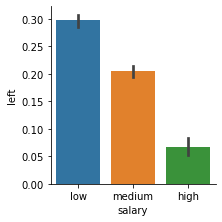

In [14]:
sns.factorplot(x="salary", y ="left", data=Data, kind="bar", size=3)
plt.show()

We can see that the persons with the low salary are more likely to leave the company

In [15]:
Data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Number of project & left

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


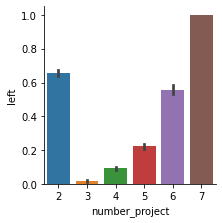

In [16]:
sns.factorplot(x="number_project", y ="left", data=Data, kind="bar", size=3)
plt.show()

time_spend_company, left

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


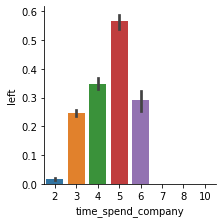

In [17]:
sns.factorplot(x="time_spend_company", y ="left", data=Data, kind="bar", size=3)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


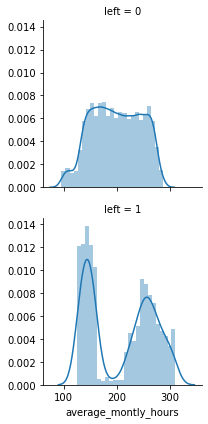

In [18]:
g = sns.FacetGrid(Data, row="left")
g.map(sns.distplot, "average_montly_hours", bins=25)
plt.show()

# Feature Engineering

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

NameError: name 'b' is not defined

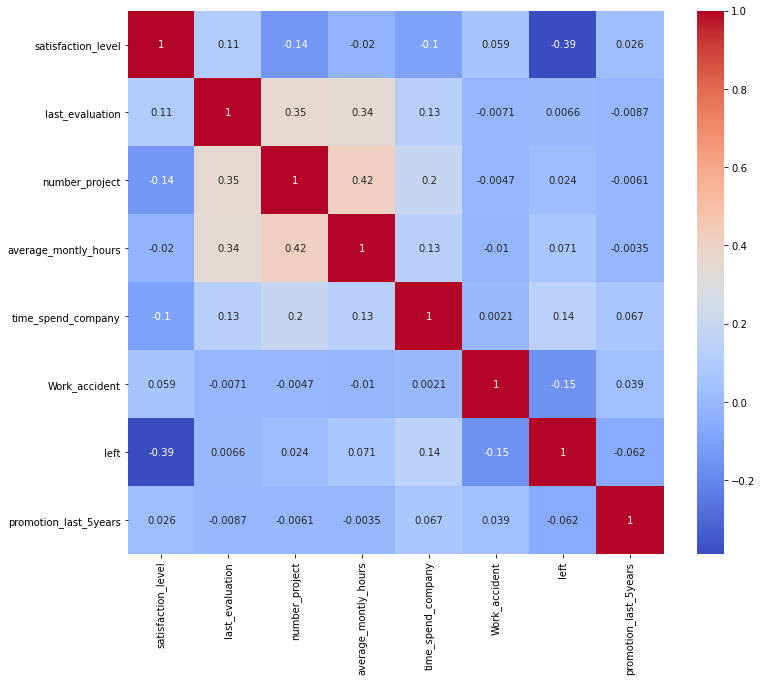

In [19]:
corr= Data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cbar=True,cmap="coolwarm")
plt.xticks(rotation=90)



plt.ylim(b, t) 
plt.show() 

Here no variables are so much correlated so that we can say that all variables are uncorrelated
so no need to remove any features lets get important features by using Randomforestclassifie

In [20]:
from sklearn.preprocessing import LabelEncoder # For change categorical variable into int
from sklearn.metrics import accuracy_score 
le=LabelEncoder()
Data['salary']=le.fit_transform(Data['salary']) #thats nice!

Data['department']=le.fit_transform(Data['department']) #not Customary decison

In [21]:
# we can select importance features by using Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier


feature_var = Data.loc[:,Data.columns != "left"]
pred_var = Data.loc[:,Data.columns=='left']

model= RandomForestClassifier(n_estimators=100)

model.fit(feature_var,pred_var)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestClassifier()

In [22]:
featimp = pd.Series(model.feature_importances_,index=feature_var.columns).sort_values(ascending=False)
print(featimp)

satisfaction_level       0.342632
number_project           0.187180
time_spend_company       0.182788
average_montly_hours     0.141201
last_evaluation          0.119915
department               0.012217
salary                   0.007799
Work_accident            0.005446
promotion_last_5years    0.000821
dtype: float64


### Machine Learning Models

In [23]:
# Importing Machine learning models library used for classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC


In [24]:
def Classification_model(model,Data,x,y):
    
    # here x is the variable which are used for prediction
    # y is the prediction variable
    
    train,test = train_test_split(Data,test_size= 0.33)
    
    train_x = Data.loc[train.index,x]   # Data for training only with features
    train_y = Data.loc[train.index,y]   # Data for training only with predcition variable
    
    test_x = Data.loc[test.index,x]     # same as for training 
    test_y = Data.loc[test.index,y]
    
    model.fit(train_x,train_y)
    
    pred=model.predict(test_x)
    
    accuracy=accuracy_score(test_y,pred)
    
    return accuracy

In [25]:
#for your knowledge

All_features=['satisfaction_level','number_project','time_spend_company',
              'average_montly_hours','last_evaluation','department',
              'salary','Work_accident','promotion_last_5years']

print(All_features)

Important_features = ['satisfaction_level','number_project','time_spend_company',
                      'average_montly_hours','last_evaluation']


print(Important_features)

Pred_var = ["left"]
print(Pred_var)

['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours', 'last_evaluation', 'department', 'salary', 'Work_accident', 'promotion_last_5years']
['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours', 'last_evaluation']
['left']


In [26]:
# Lets us make a list of models

models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]

Classification_models = [RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=7),LogisticRegression(),SVC()]

Model_Accuracy = []

for model in Classification_models:
    Accuracy=Classification_model(model,Data,All_features,Pred_var)
    Model_Accuracy.append(Accuracy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_mod

In [27]:
Accuracy_with_all_features = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with all features":Model_Accuracy
     
    })

In [28]:
Accuracy_with_all_features.sort_values(by="Accuracy with all features",ascending=False).reset_index(drop=True)

,Classification Model,Accuracy with all features
0,RandomForestClassifier,0.990909
1,KNN,0.928485
2,Gaussian Naive Bays,0.786869
3,Support_Vector,0.782626
4,Logistic_Regression,0.772929


#### Observation 

1. The Random Forest is at the top followed by Support_vector and KNN

2. These all are giving accuracy more than 90% for validation data i.e. test data that is not bad

3. In Next we will try same with but only with important features suggested by RandomForest 

In [29]:
# Lets try with Important features

Model_Accuracy = []

for model in Classification_models:
    Accuracy=Classification_model(model,Data,Important_features,Pred_var) # Just instead of all features give only important features
    Model_Accuracy.append(Accuracy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/vali

In [30]:
Accuracy_with_important_features = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with Important features":Model_Accuracy
     
    })
Accuracy_with_important_features.sort_values(by="Accuracy with Important features",ascending=False).reset_index(drop=True)

,Classification Model,Accuracy with Important features
0,RandomForestClassifier,0.991717
1,KNN,0.949697
2,Gaussian Naive Bays,0.817172
3,Logistic_Regression,0.771919
4,Support_Vector,0.771919


1. By using the important features there is a slight increase in accuracy for all classification models

2. The gaussian navie bays and KNN show a increase of 2 % in accuracy

### Machine Learning Models With Cross Validation

1. In this we will do the cross validation with the models to get there mean accuracy

2. From 3.1 we came to know that by using important features there is increase in the accuracy for all models so in this we will go only with important features

In [31]:
from sklearn.model_selection import cross_val_score # This is used for to caculate the score of cross validation by using Kfold

def Classification_model_CV(model,Data,x,y):
    
    # here x is the variable which are used for prediction
    # y is the prediction variable
    
    data_x = Data.loc[:,x]
    # Here no need of training and test data because in cross validation it splits data into 
    # train and test itself # data_x repersent features
    
    data_y = Data.loc[:,y] # data for predication

    
    scores= cross_val_score(model,data_x,data_y,scoring="accuracy",cv=10)
    
    print(scores) # print the scores
    
    print('')
    
    accuracy=scores.mean()
    return accuracy

In [32]:
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]

Classification_models = [RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=7),LogisticRegression(),SVC()]

Model_Accuracy = []

for model,z in zip(Classification_models,models):
    
    print(z) # Print the name of model
    print('')
    
    Accuracy=Classification_model_CV(model,Data,Important_features,Pred_var)
    
    Model_Accuracy.append(Accuracy)

RandomForestClassifier



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

[0.99866667 0.998      0.98333333 0.98       0.97866667 0.994
 0.99866667 0.998      0.99933333 1.        ]

Gaussian Naive Bays

[0.814      0.79       0.82666667 0.81       0.806      0.80266667
 0.80733333 0.78866667 0.80133333 0.7838559 ]

KNN



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

[0.956      0.94933333 0.95466667 0.95       0.95133333 0.95
 0.96       0.95066667 0.96266667 0.95997332]

Logistic_Regression



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

[0.77733333 0.76933333 0.77866667 0.77866667 0.78666667 0.77866667
 0.776      0.76066667 0.71       0.6897932 ]

Support_Vector



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

[0.788      0.78133333 0.79066667 0.786      0.77933333 0.78333333
 0.78533333 0.78533333 0.78666667 0.78052035]



In [33]:
Accuracy_with_CV = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with CV":Model_Accuracy
     
    })
Accuracy_with_CV.sort_values(by="Accuracy with CV",ascending=False).reset_index(drop=True)

,Classification Model,Accuracy with CV
0,RandomForestClassifier,0.992867
1,KNN,0.954464
2,Gaussian Naive Bays,0.803052
3,Support_Vector,0.784652
4,Logistic_Regression,0.760579


### Machine Learning Models With Parameter tuning

1. In this we will use  Grid SearchCV to find the best parameter for a model 

2. in this we will use important features too

In [34]:
from sklearn.model_selection import GridSearchCV 
def Classification_model_GridSearchCV(model,Data,x,y,params):
    
    # here params repersent Parameters
    data_x = Data.loc[:,x]  
    data_y = Data.loc[:,y] 
    clf = GridSearchCV(model,params,scoring="accuracy",cv=5)
    
    clf.fit(data_x,data_y)
    
    print("best score is :")
    print(clf.best_score_)
    print('')
    print("best estimator is :")
    print(clf.best_estimator_)

    return (clf.best_score_)

In [35]:
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]

Model_Accuracy=[]

model = RandomForestClassifier()

param_grid = {'n_estimators':(70,80,90,100),'criterion':('gini','entropy'),'max_depth':[25,30]}

Accuracy=Classification_model_GridSearchCV(model,Data,Important_features,Pred_var,param_grid)

Model_Accuracy.append(Accuracy)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

best score is :
0.991866288762921

best estimator is :
RandomForestClassifier(max_depth=25, n_estimators=70)


In [36]:
model = GB()
param_grid={}
Accuracy=Classification_model_GridSearchCV(model,Data,Important_features,Pred_var,param_grid)
Model_Accuracy.append(Accuracy)

best score is :
0.7924477714793821

best estimator is :
GaussianNB()


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

In [37]:
model=knn()
param_grid={'n_neighbors':[5,15],'weights':('uniform','distance'),'p':[1,5]}
Accuracy=Classification_model_GridSearchCV(model,Data,Important_features,Pred_var,param_grid)
Model_Accuracy.append(Accuracy)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

best score is :
0.9606634878292765

best estimator is :
KNeighborsClassifier(p=5, weights='distance')


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [38]:
model=LogisticRegression()
param_grid={'C': [0.01,0.1,1,10],'penalty':('l1','l2')}
Accuracy=Classification_model_GridSearchCV(model,Data,Important_features,Pred_var,param_grid)
Model_Accuracy.append(Accuracy)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

best score is :
0.7449067689229744

best estimator is :
LogisticRegression(C=0.1)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [39]:
model=SVC()
param_grid={'C': [1,10,20,100],'gamma':[0.1,1,10]} 
Accuracy=Classification_model_GridSearchCV(model,Data,Important_features,Pred_var,param_grid)
Model_Accuracy.append(Accuracy)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

best score is :
0.975999510948094

best estimator is :
SVC(C=20, gamma=10)


In [40]:
Accuracy_with_GridSearchCV = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with GridSearchCV":Model_Accuracy
     
    })
Accuracy_with_GridSearchCV.sort_values(by="Accuracy with GridSearchCV",ascending=False).reset_index(drop=True)

,Classification Model,Accuracy with GridSearchCV
0,RandomForestClassifier,0.991866
1,Support_Vector,0.976000
2,KNN,0.960663
3,Gaussian Naive Bays,0.792448
4,Logistic_Regression,0.744907


In [41]:
Comparison=pd.merge(pd.merge(pd.merge(Accuracy_with_all_features,Accuracy_with_important_features,on='Classification Model'),Accuracy_with_CV,on='Classification Model'),Accuracy_with_GridSearchCV,on='Classification Model')

In [42]:
Comparison1=Comparison.loc[:,["Classification Model","Accuracy with all features","Accuracy with Important features","Accuracy with CV","Accuracy with GridSearchCV"]]

In [43]:
Comparison1

,Classification Model,Accuracy with all features,Accuracy with Important features,Accuracy with CV,Accuracy with GridSearchCV
0,RandomForestClassifier,0.990909,0.991717,0.992867,0.991866
1,Gaussian Naive Bays,0.786869,0.817172,0.803052,0.792448
2,KNN,0.928485,0.949697,0.954464,0.960663
3,Logistic_Regression,0.772929,0.771919,0.760579,0.744907
4,Support_Vector,0.782626,0.771919,0.784652,0.976000


**Conclusion**

 1. Here we can compare the accuracy obtained by different Classification Models  with different strategy
 2. For A quick revision
 3. Accuracy with all features means the all features of data were used for prediction of will employee left or not?  this accuracy is obtained on the test data which was not used in training.
 4. Accuracy with important features means the same as above but here only 5 most important features were used. The importance of features we got by using Random Forest Classifier.
 5. Accuracy with CV means the mean of accuracies which were obtained on iteration of one CV. here 10 iterations were used
 6. Accuracy with GridSearchCV means the best score obtained after tuning the model.  Here for CV only 5 folds were used

 7. Thank you
